In [3]:
import numpy as np
import pandas as pd


In [39]:
# Se cargan los datos desde la url en GitHub
url = "https://raw.githubusercontent.com/ArleyF/proyecto_enfermedades_cardiacas/master/dataset/heart_2020_modified.csv"
df = pd.read_csv(url)

In [40]:
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,NaN,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,NaN,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,NaN,No,No,No


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               304185 non-null  float64
 2   Smoking           295199 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              292273 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         298174 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [42]:
pd.isnull(df).sum()

HeartDisease            0
BMI                 15610
Smoking             24596
AlcoholDrinking         0
Stroke                  0
PhysicalHealth          0
MentalHealth            0
DiffWalking             0
Sex                     0
AgeCategory             0
Race                27522
Diabetic                0
PhysicalActivity        0
GenHealth               0
SleepTime           21621
Asthma                  0
KidneyDisease           0
SkinCancer              0
dtype: int64

In [43]:
k = df.isna().sum()
((round(k[k!=0]/df.shape[0], 2) * 100).astype(int)).astype(str).str.cat(['' for i in range(len(k[k!=0]))], sep='%')

BMI          5%
Smoking      8%
Race         9%
SleepTime    7%
dtype: object

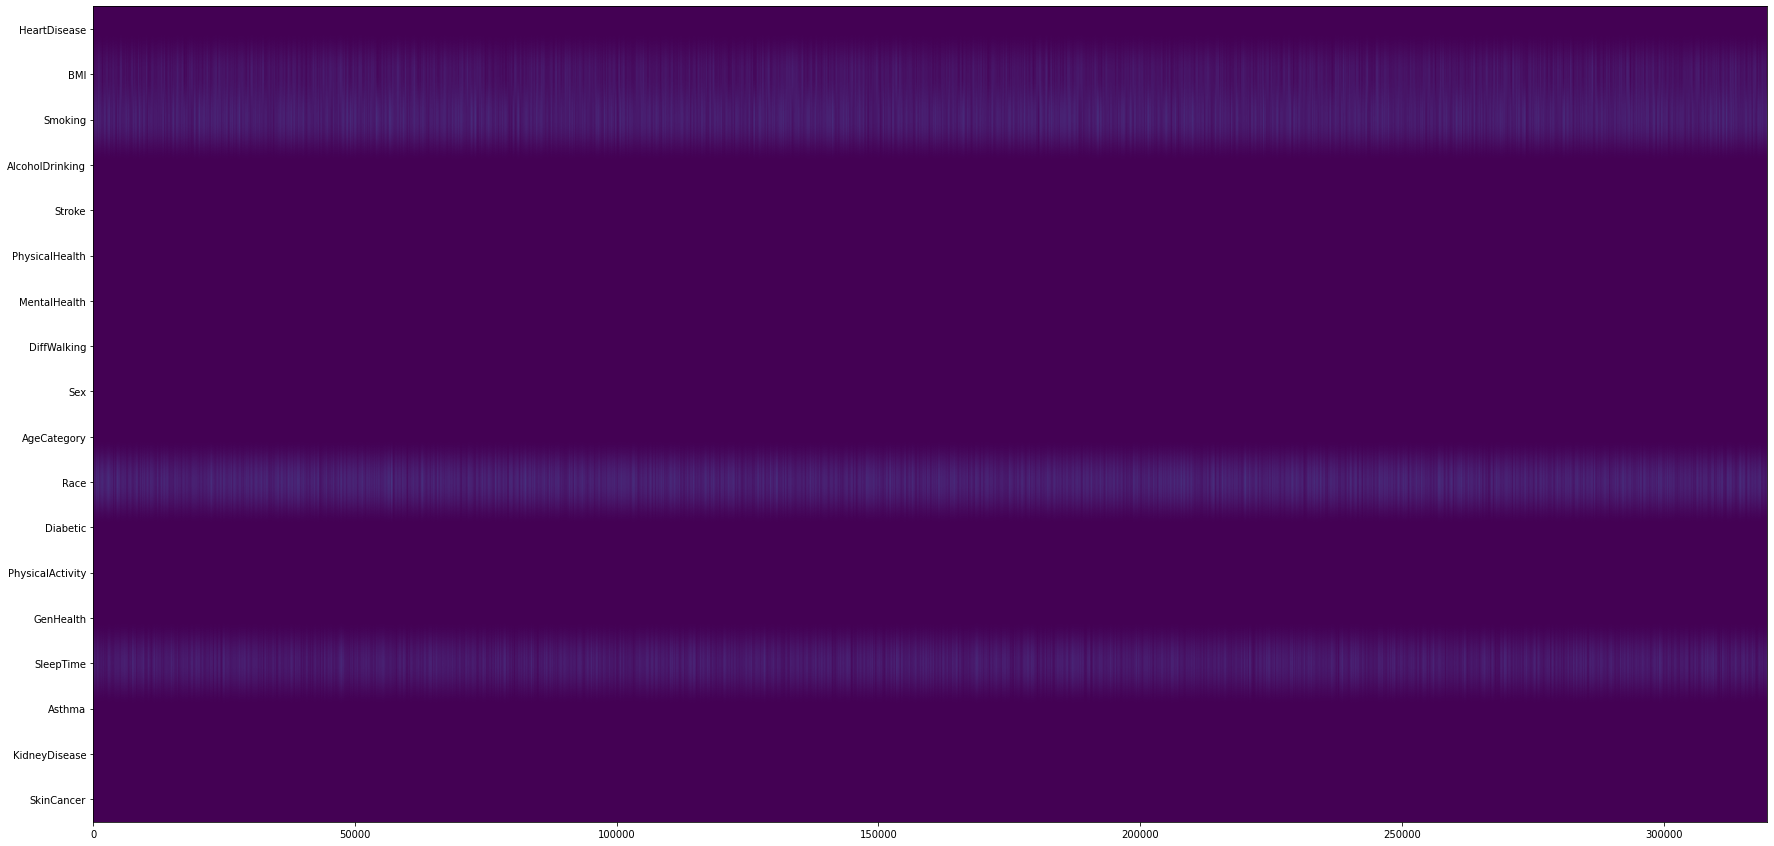

In [44]:
#Gráfico de datos perdidos
import matplotlib.pyplot as plt
ax = plt.figure(figsize=(30,15)).add_subplot(111)
ax.imshow(df.isna().values.T)
ax.set_aspect('auto')
plt.yticks(range(df.shape[1]), df.columns);

In [45]:
df.nunique()

HeartDisease           2
BMI                 3577
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [46]:
df['Diabetic'].value_counts() 

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [47]:
df['GenHealth'].value_counts() 

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [48]:
df['Race'].value_counts() 

White                             223984
Hispanic                           25113
Black                              21061
Other                               9969
Asian                               7372
American Indian/Alaskan Native      4774
Name: Race, dtype: int64

In [49]:
df =  df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
df['Diabetic'] = df['Diabetic'].astype(int)

In [50]:
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1.0,0,0,3.0,30.0,0,0,55-59,White,1,1,Very good,5.0,1,0,1
1,0,NaN,0.0,0,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1.0,0,0,20.0,30.0,0,1,65-69,NaN,1,1,Fair,8.0,1,0,0
3,0,24.21,0.0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0.0,0,0,28.0,0.0,1,0,40-44,White,0,1,Very good,8.0,0,0,0
5,1,28.87,1.0,0,0,6.0,0.0,1,0,75-79,Black,0,0,Fair,12.0,0,0,0
6,0,21.63,0.0,0,0,15.0,0.0,0,0,70-74,White,0,1,Fair,4.0,1,0,1
7,0,31.64,1.0,0,0,5.0,0.0,1,0,80 or older,White,1,0,Good,9.0,1,0,0
8,0,26.45,0.0,0,0,0.0,0.0,0,0,80 or older,White,0,0,Fair,5.0,0,1,0
9,0,40.69,0.0,0,0,0.0,0.0,1,1,65-69,White,0,1,Good,NaN,0,0,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               304185 non-null  float64
 2   Smoking           295199 non-null  float64
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  object 
 10  Race              292273 non-null  object 
 11  Diabetic          319795 non-null  int32  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         298174 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31